In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv("train-data.csv")

In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<AxesSubplot:>

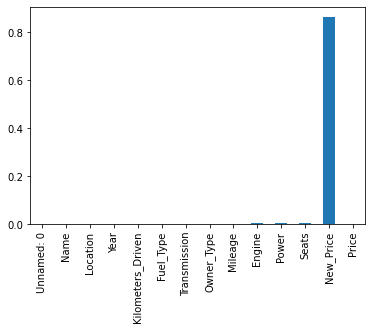

In [6]:
a = train_data.isnull().sum()
a =  a/(train_data.shape[0])
%matplotlib inline
a.plot.bar()

In [7]:
# Removing New_Price and Unnamed: 0 columns
train_data.drop(["New_Price"], axis = 1, inplace = True)
train_data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [8]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


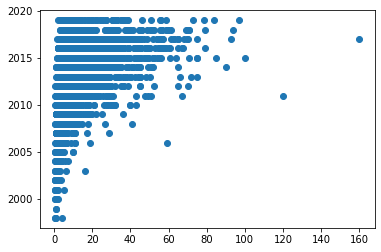

In [9]:
plt.scatter(train_data['Price'], train_data['Year'])
plt.show()

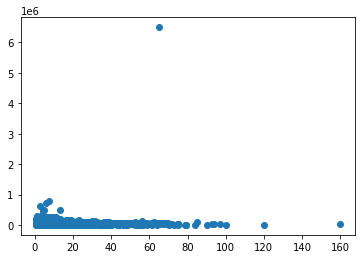

In [10]:
plt.scatter(train_data['Price'], train_data['Kilometers_Driven'])
plt.show()

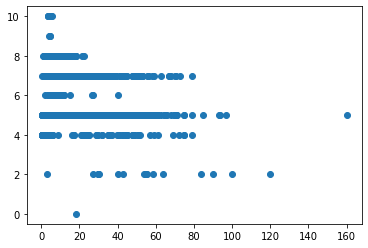

In [11]:
plt.scatter(train_data['Price'], train_data['Seats'])
plt.show()

In [12]:
def f(s):
    li = list(s.split(" "))
    return li[0]
train_data['Name'] = train_data['Name'].apply(f)

In [13]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
train_data['Name'].describe()

count       6019
unique        31
top       Maruti
freq        1211
Name: Name, dtype: object

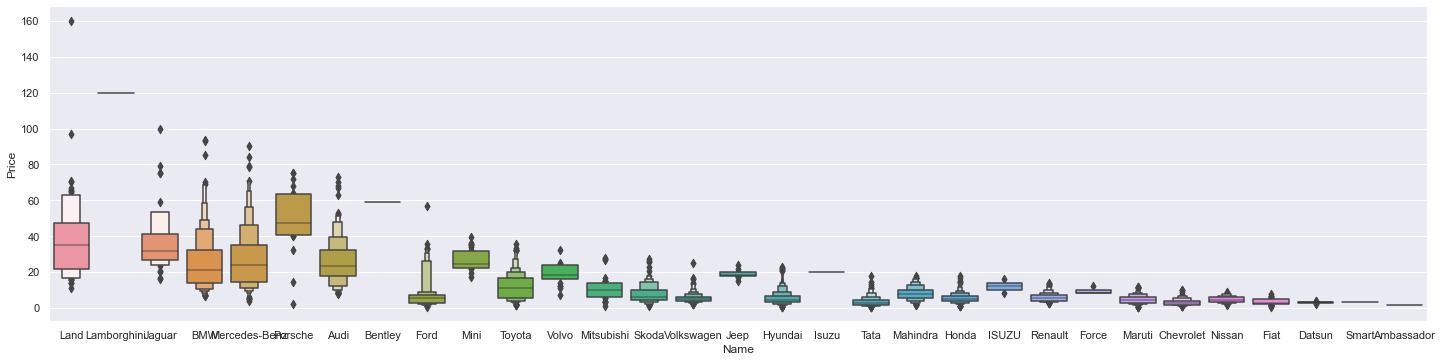

In [15]:
sns.set()
var = 'Name'
sns.catplot(y = 'Price', x = var, data = train_data.sort_values('Price', ascending = False), kind = "boxen",aspect=4)
plt.show()

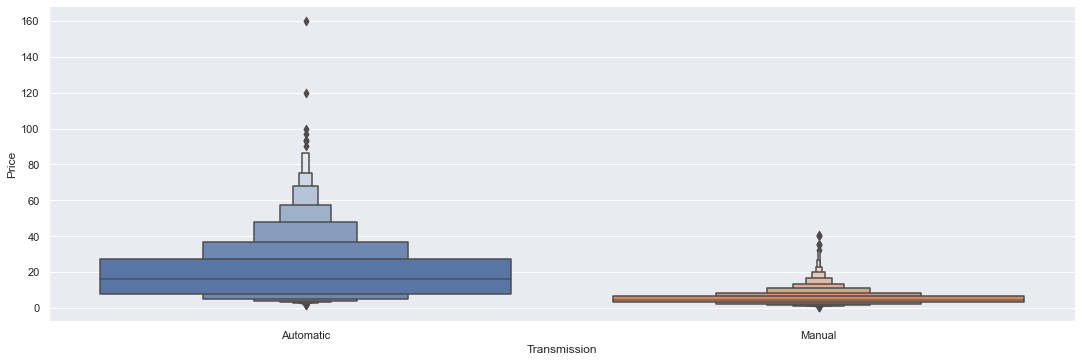

In [16]:
sns.set()
var = 'Transmission'
sns.catplot(y = 'Price', x = var, data = train_data.sort_values('Price', ascending = False), kind = "boxen",aspect=3)
plt.show()

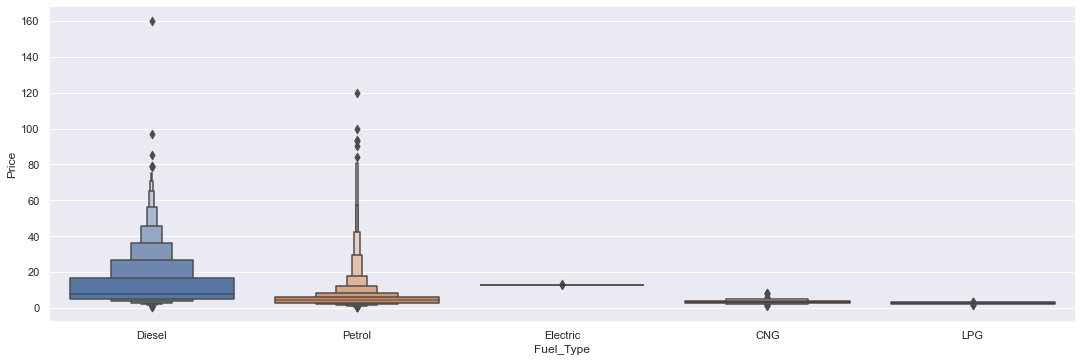

In [17]:
sns.set()
var = 'Fuel_Type'
sns.catplot(y = 'Price', x = var, data = train_data.sort_values('Price', ascending = False), kind = "boxen",aspect=3)
plt.show()

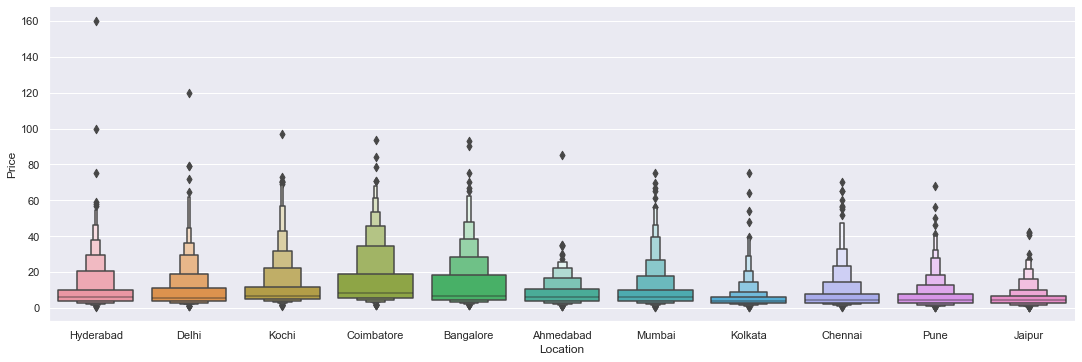

In [18]:
sns.set()
var = 'Location'
sns.catplot(y = 'Price', x = var, data = train_data.sort_values('Price', ascending = False), kind = "boxen",aspect=3)
plt.show()

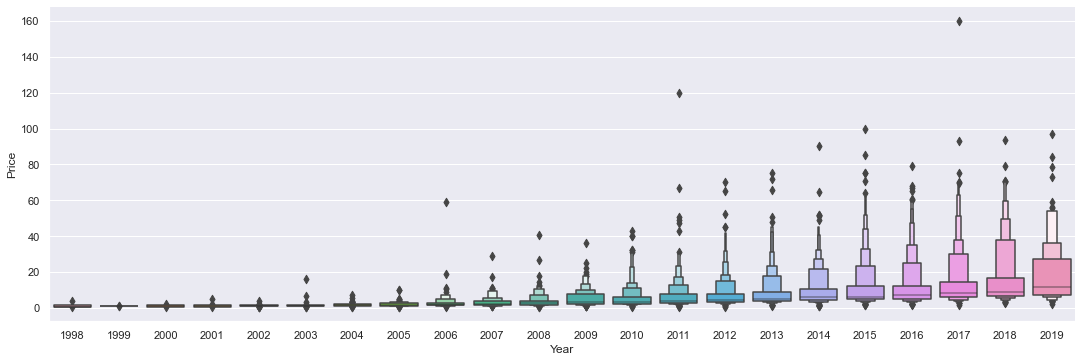

In [19]:
sns.set()
var = 'Year'
sns.catplot(y = 'Price', x = var, data = train_data.sort_values('Price', ascending = False), kind = "boxen",aspect=3)
plt.show()

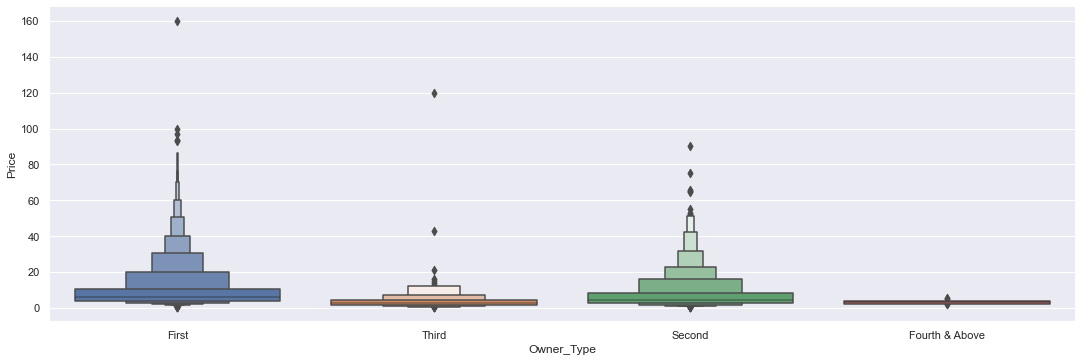

In [20]:
sns.set()
var = 'Owner_Type'
sns.catplot(y = 'Price', x = var, data = train_data.sort_values('Price', ascending = False), kind = "boxen",aspect=3)
plt.show()

In [21]:
train_data["Mileage"] = train_data["Mileage"].str.replace("km/kg","")
train_data["Mileage"] = train_data["Mileage"].str.replace("kmpl","")
train_data["Engine"] = train_data["Engine"].str.replace("CC","")
train_data["Power"] = train_data["Power"].str.replace("bhp","")

In [22]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [23]:
train_data['Engine']=train_data['Engine'].astype(float)
train_data['Mileage']=train_data['Mileage'].astype(float)

In [24]:
train_data['Power'] = pd.to_numeric(train_data['Power'].str.lower().str.split().str.get(0), errors='coerce')

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [26]:
#Handling missing values
m=train_data['Mileage'].mean()
train_data['Mileage'].fillna(value=m, inplace=True)
m=train_data['Engine'].mean()
train_data['Engine'].fillna(value=m, inplace=True)
m=train_data['Seats'].mean()
train_data['Seats'].fillna(value=m, inplace=True)
m=train_data['Power'].mean()
train_data['Power'].fillna(value=m, inplace=True)

In [27]:
col_names = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
sc = StandardScaler()
train_data[col_names] = sc.fit_transform(train_data[col_names])

In [28]:
X = train_data.copy()
X.drop(["Price"], axis = 1, inplace = True)
y = train_data.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,0.145315,CNG,Manual,First,1.847799,-1.039653,-1.035066,5.0,1.75
1,Hyundai,Pune,2015,-0.194369,Diesel,Manual,First,0.335077,-0.065515,0.243242,5.0,12.50
2,Honda,Chennai,2011,-0.139581,Petrol,Manual,First,0.014197,-0.704376,-0.461293,5.0,4.50
3,Maruti,Chennai,2012,0.309678,Diesel,Manual,First,0.575192,-0.622642,-0.460166,7.0,6.00
4,Audi,Coimbatore,2013,-0.197985,Diesel,Automatic,Second,-0.640661,0.578351,0.517541,5.0,17.74


In [30]:
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)

In [31]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [32]:
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

In [33]:
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [34]:
model = LinearRegression()

In [35]:
model.fit(OH_X_train, y_train)

LinearRegression()

In [36]:
val_predictions = model.predict(OH_X_valid)

In [37]:
print(mean_absolute_error(y_test, val_predictions))

1882027279.6070373


In [38]:
model.score(OH_X_train, y_train)

0.773591044651861

In [39]:
my_model = XGBRegressor()
my_model.fit(OH_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
predictions = my_model.predict(OH_X_valid)

In [41]:
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 1.412115684081946


In [42]:
my_model.score(OH_X_train, y_train)

0.9955885814027274

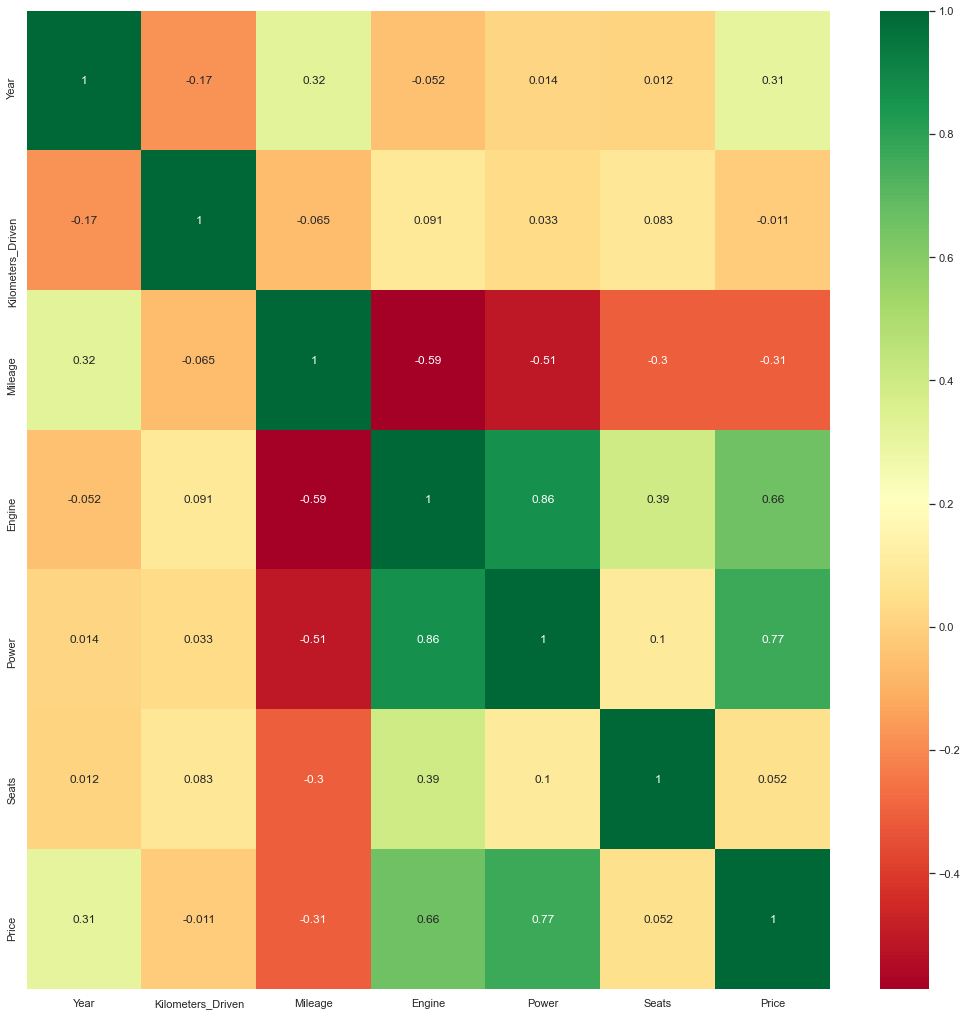

In [43]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()